#Archisha Sinha

##Domain: Computer Vision
##Topic: Differene of Gaussian and Laplacian of Gaussian

#Experiment 2: To highlight edges using DoG and LoG

In [ ]:
import cv2
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = data.astronaut()

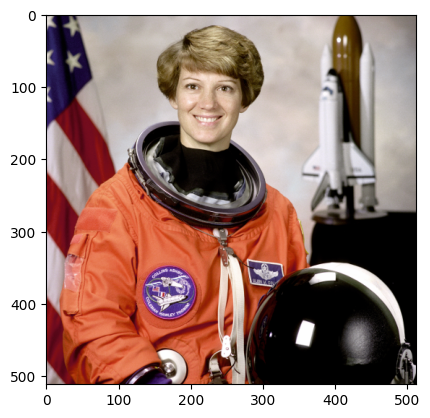

In [ ]:
plt.imshow(image)

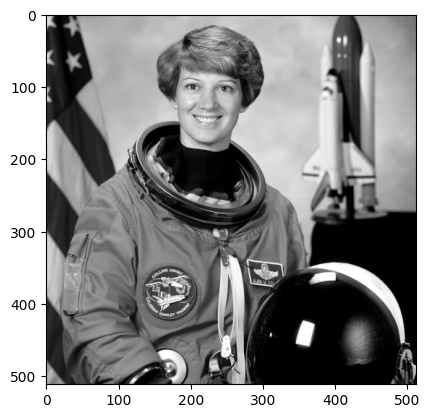

In [ ]:
image_g = rgb2gray(image)
plt.imshow(image_g, cmap='gray')      #Minimum value of pixel maps to 0 and maximum value maps to 255 and mid value maps to gray

In [ ]:
print(image.shape)    # There are 3 matrix of colours that is red green and blue
print(image_g.shape)  # There is only one matrix of grayscale (done by averaging of all those 3 matrix)

(512, 512, 3)
(512, 512)


## DoG: Difference of Gaussian

In [ ]:
f_sigma1= cv2.GaussianBlur(image_g, (31,31), 1)    # We are using built in Gaussian fn of Gaussian Blur of size 31x31 and standard deriavtion = 1
f_sigma2= cv2.GaussianBlur(image_g, (31,31), 2)    # We are using built in Gaussian fn of Gaussian Blur of size 31x31 and standard deriavtion = 2
f_sigma3= cv2.GaussianBlur(image_g, (31,31), 3)    # We are using built in Gaussian fn of Gaussian Blur of size 31x31 and standard deriavtion = 3
f_sigma4= cv2.GaussianBlur(image_g, (31,31), 4)    # We are using built in Gaussian fn of Gaussian Blur of size 31x31 and standard deriavtion = 4
f_sigma7= cv2.GaussianBlur(image_g, (31,31), 7)    # We are using built in Gaussian fn of Gaussian Blur of size 31x31 and standard deriavtion = 7

Text(0.5, 1.0, 'Gaussian Filtered Image, Sigma=7')

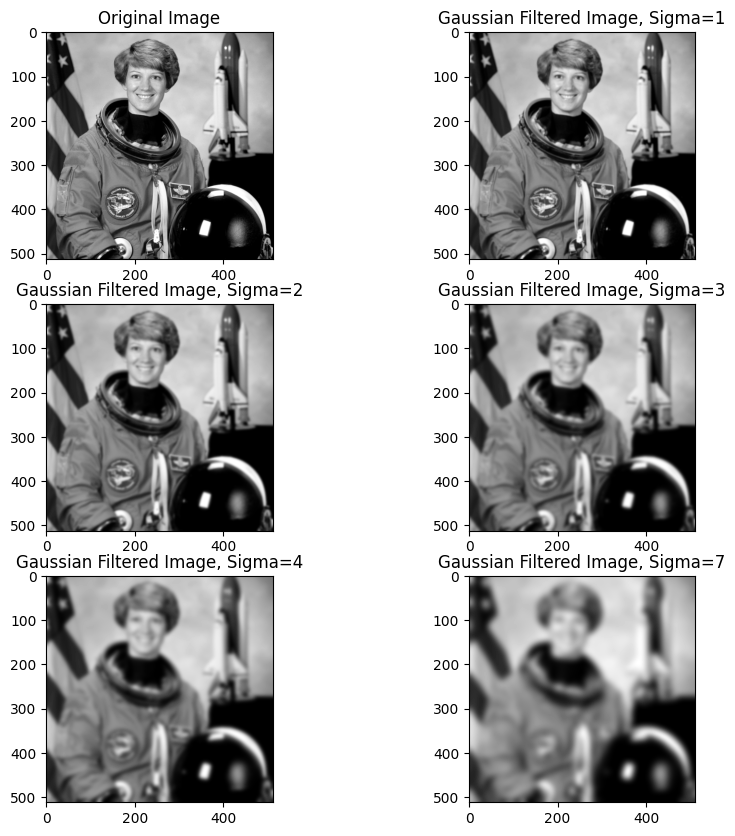

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.imshow(image_g, cmap='gray')
plt.title('Original Image')

plt.subplot(3,2,2)
plt.imshow(f_sigma1, cmap='gray')
plt.title('Gaussian Filtered Image, Sigma=1')

plt.subplot(3,2,3)
plt.imshow(f_sigma2, cmap='gray')
plt.title('Gaussian Filtered Image, Sigma=2')

plt.subplot(3,2,4)
plt.imshow(f_sigma3, cmap='gray')
plt.title('Gaussian Filtered Image, Sigma=3')


plt.subplot(3,2,5)
plt.imshow(f_sigma4, cmap='gray')
plt.title('Gaussian Filtered Image, Sigma=4')

plt.subplot(3,2,6)
plt.imshow(f_sigma7, cmap='gray')
plt.title('Gaussian Filtered Image, Sigma=7')

Inference:

- We can see that, as the value of standard deviation increases, the bluring effect also increases.
- Thus the clarity of the image fades as there is an increase in the sigma value.
- After the sigma=7, there is not much differnce in the image as it has blured to a lot extent

In [ ]:
dog_1_7 = f_sigma1 - f_sigma7    # Difference of Gaussian is 1 to 7
dog_2_7 = f_sigma2 - f_sigma7    # Difference of Gaussian is 2 to 7
dog_3_7 = f_sigma3 - f_sigma7    # Difference of Gaussian is 3 to 7
dog_4_7 = f_sigma4 - f_sigma7    # Difference of Gaussian is 4 to 7

In [ ]:
mx= np.max(np.abs(dog_1_7))   # max value of difference of gaussian
th= mx*0.05                 # threshold value

dog_1_7[np.abs(dog_1_7)>th]=255   # setting the threshold value
dog_2_7[np.abs(dog_2_7)>th]=255
dog_3_7[np.abs(dog_3_7)>th]=255
dog_4_7[np.abs(dog_4_7)>th]=255

Text(0.5, 1.0, 'DoG for Sigma=4 and Sigma=7')

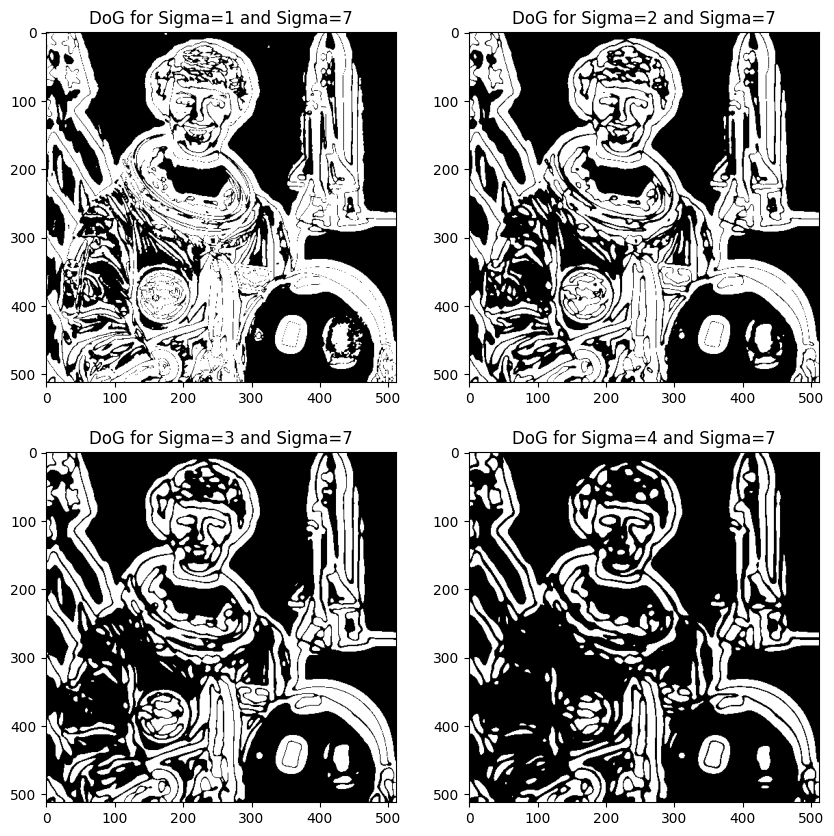

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(dog_1_7, cmap='gray')
plt.title('DoG for Sigma=1 and Sigma=7')

plt.subplot(2,2,2)
plt.imshow(dog_2_7, cmap='gray')
plt.title('DoG for Sigma=2 and Sigma=7')

plt.subplot(2,2,3)
plt.imshow(dog_3_7, cmap='gray')
plt.title('DoG for Sigma=3 and Sigma=7')

plt.subplot(2,2,4)
plt.imshow(dog_4_7, cmap='gray')
plt.title('DoG for Sigma=4 and Sigma=7')


Conclusion:
- Difernce of Gaussian is used to highlight the edges of the given image Astranaut.
- For DoG with sigma 1 and 7, fine details of the image is highlighted.
- For DoG with sigma 4 amd 7, fine details disappear and only outlines of the astraunaut are visible.
- Since, for threshold =0.2, the outline of the image is not visible, thus we reduce it to 0.05, and we get the clear outline of the astraunaut for DoG with sigma 4 and 7.
- This is because for Sigma=1, blurs the fine details and filtered image has BLURED fine details but Sigma=7, disappears the fine details and filtered image has NO fine details
- Therefore, DoG 1-7 shows fine detailes of the image.
-For sigma=4, the image doesnt have fine details and same for sigma=7
- To highlight the outline of image, threshold is reduced from 0.2 to 0.5. This is bec more pixels will cross the thresholdvalue.

##LoG: Laplacian of Gaussian

In [ ]:
image= cv2.imread('/content/dhoni.jpg', cv2.IMREAD_COLOR)

In [ ]:
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     #Python reads RGBas BGR thus we convert it to RGB

In [ ]:
image_b = cv2.GaussianBlur(image, (3,3), 1)   #Bluring is done to reduce the effect of noise
image_g = cv2.cvtColor(image_b, cv2.COLOR_RGB2GRAY)   #Then we change it again to RGB

Text(0.5, 1.0, 'Gaussian Filtered Image')

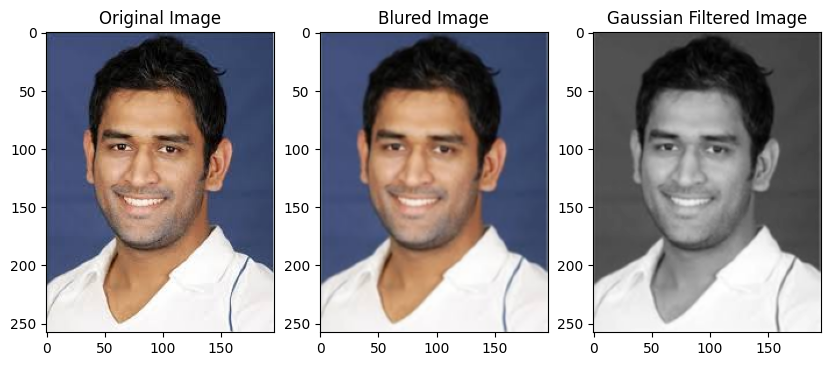

In [ ]:

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(image_b, cmap='gray')
plt.title('Blured Image')

plt.subplot(1,3,3)
plt.imshow(image_g, cmap='gray')
plt.title('Gaussian Filtered Image')

In [ ]:
l_image = cv2.Laplacian(image_g, cv2.CV_16S, ksize=3)
l_image_th = l_image.copy()
mx= np.max(np.abs(l_image))
th= mx*0.2
l_image[np.abs(l_image)>th]=255

Text(0.5, 1.0, 'Laplacian Thresholded Image')

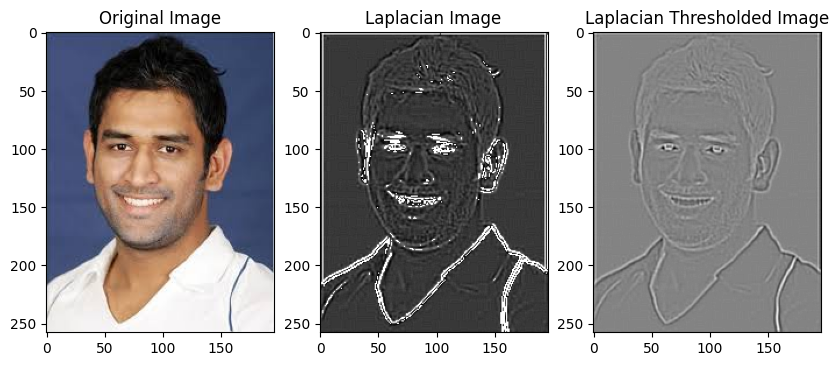

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(l_image, cmap='gray')
plt.title('Laplacian Image')

plt.subplot(1,3,3)
plt.imshow(l_image_th, cmap='gray')
plt.title('Laplacian Thresholded Image')

##CONCLUSION

- Laplacian of Gassian is used to identify the edges of the image dhoni for the filter size of 3 and threshold of 0.5 to highlight most of the boundary pixels, the threshold is reduced from 0.5 to 0.2.

- Dog and Log is equal provided Dog uses 2 sigma values with ratio of 1.6.
- Log takes care of Sigma value. hence we dont have to apply it differently.